In [5]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def Midpoint_Search(S, pts, n):
    for _ in range(n):
        pts2 = [S(pt) for pt in pts]
        
        midpts = [(pts2[i] + pts2[i+1]) * 0.5 for i in range(len(pts2) - 1)]
        
        for i in range(len(midpts)):
            def distance_from_midpoint(p):
                return np.linalg.norm(S(p) - midpts[i])
            
            pts[i] = minimize(distance_from_midpoint, pts[i]).x

    return pts

# Define the torus surface function
def torus_func(r=1, R=4):
    r=r
    R=R
    def torus(p):
        u, v = p
        x = (R + r * np.cos(v)) * np.cos(u)
        y = (R + r * np.cos(v)) * np.sin(u)
        z = r * np.sin(v)
        return np.array([x, y, z])
    return torus

def torus_meshgrid(R=4, r=1, u_vals=None, v_vals=None):
    """Generate the torus meshgrid based on given R, r, u, and v values."""
    if u_vals is None:
        u_vals = np.linspace(0, 2*np.pi, 100)
    if v_vals is None:
        v_vals = np.linspace(0, 2*np.pi, 100)
    U, V = np.meshgrid(u_vals, v_vals)
    X = (R + r * np.cos(V)) * np.cos(U)
    Y = (R + r * np.cos(V)) * np.sin(U)
    Z = r * np.sin(V)
    return X, Y, Z

def plot_torus_with_points_fixed_v2(result_pts, R=4, r=1, alpha=0.3, u_vals=None, v_vals=None):
    X, Y, Z = torus_meshgrid(R, r, u_vals, v_vals)
    
    # Extract the refined points in R^3
    refined_X = [torus(pt)[0] for pt in result_pts]
    refined_Y = [torus(pt)[1] for pt in result_pts]
    refined_Z = [torus(pt)[2] for pt in result_pts]

    # Plot the torus and the refined points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='b', alpha=alpha)
    ax.scatter(refined_X, refined_Y, refined_Z, color='r', s=50, label="Refined Points")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(f'Torus with Refined Points (R={R}, r={r})')
    
    # Set equal scaling
    ax.set_box_aspect([1, 1, 1])
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
    mid_x = (X.max()+X.min()) * 0.5
    mid_y = (Y.max()+Y.min()) * 0.5
    mid_z = (Z.max()+Z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

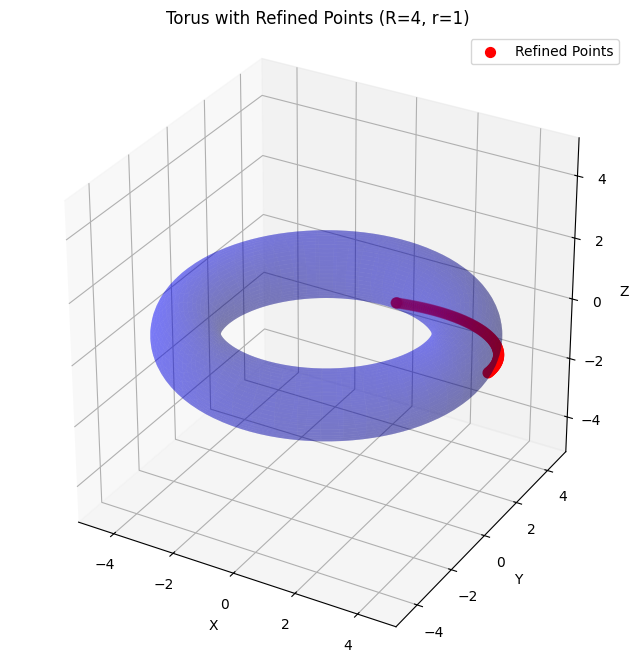

In [6]:
torus = torus_func()
# Sample points in I^2 (initially taken equidistant in the u,v space)
# pts = [(u, v) for u in np.linspace(0, 0.5*np.pi, 10)[:-1] for v in np.linspace(0.5*np.pi, 1*np.pi, 10)[:-1]]
pts = np.c_[np.linspace(0, 0.5*np.pi, 100)[:-1], np.linspace(0*np.pi, -0.5*np.pi, 100)[:-1]]

# Run the Midpoint_Search function for 10 iterations
result_pts = Midpoint_Search(torus, pts, 10)

result_pts

# Plot with default values
plot_torus_with_points_fixed_v2(result_pts)
